<h1> Automotive Insurance Interest Prediction using Machine Learning </h1>

<h4> Derek Lilienthal and Karandeep Singh </h4>

<h1>Introduction </h1>

In this project, we explored a data set that belonged to our client, an Insurance company that has provided Health Insurance to its customers, we set out to predict whether the policyholders from the past year will also be interested in Vehicle Insurance provided by the same company. <br>

This data set has some very unique predictors, below are definitions to make reading and exploring the project much easier.

Link to data set: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

<b>Id:</b> Unique ID for the customer <br>
<b>Gender:</b>		Gender of the customer<br>
<b>Age:</b>			Age of the customer<br>
<b>Driving_License:</b>	0 : Customer does not have DL, 1 : Customer already has DL<br>
<b>Region_Code:</b>		Unique code for the region of the customer<br>
<b>Previously_Insured:</b>	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance <br>
<b>Vehicle_Age:</b>		Age of the Vehicle <br>
<b>Vehicle_Damage:</b>	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past. <br>
<b>Annual_Premium:</b>	The amount customer needs to pay as premium in the year <br>
<b>PolicySalesChannel:</b>	Anonymized Code for the channel of outreaching to the customer ie. Different Agents,	 Over Mail, Over Phone, In Person, etc. <br>
<b>Vintage:</b>		Number of Days, Customer has been associated with the company <br>
<b>Response:</b>		1 : Customer is interested, 0 : Customer is not interested <br>

In this project, we were not as concerned with accuracy of our models because we don't need to know how accurate we are at predicting that someone is or is not interested in car insurance. Instead, we want to know how many people are actually interested. So the focus of our models will be to improve the overall precision and recall <b> NOT </b> the accuracy. 

<h1> Initial Exploration </h1>

###### Import the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(color_codes=True)
sns.set(font_scale=2)

In [2]:
# Read in the data
df = pd.read_csv('https://raw.githubusercontent.com/dblilienthal/CSV_Files/main/health_insurance_data/train.csv') # This is to get the data online
#df = pd.read_csv("C:/Users/Karandeep Singh/Downloads/health_insurance_data.csv") # This is my local data link

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df.describe(include=['O'])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


Below is a graph of how many unique values for each columns in the data set. 

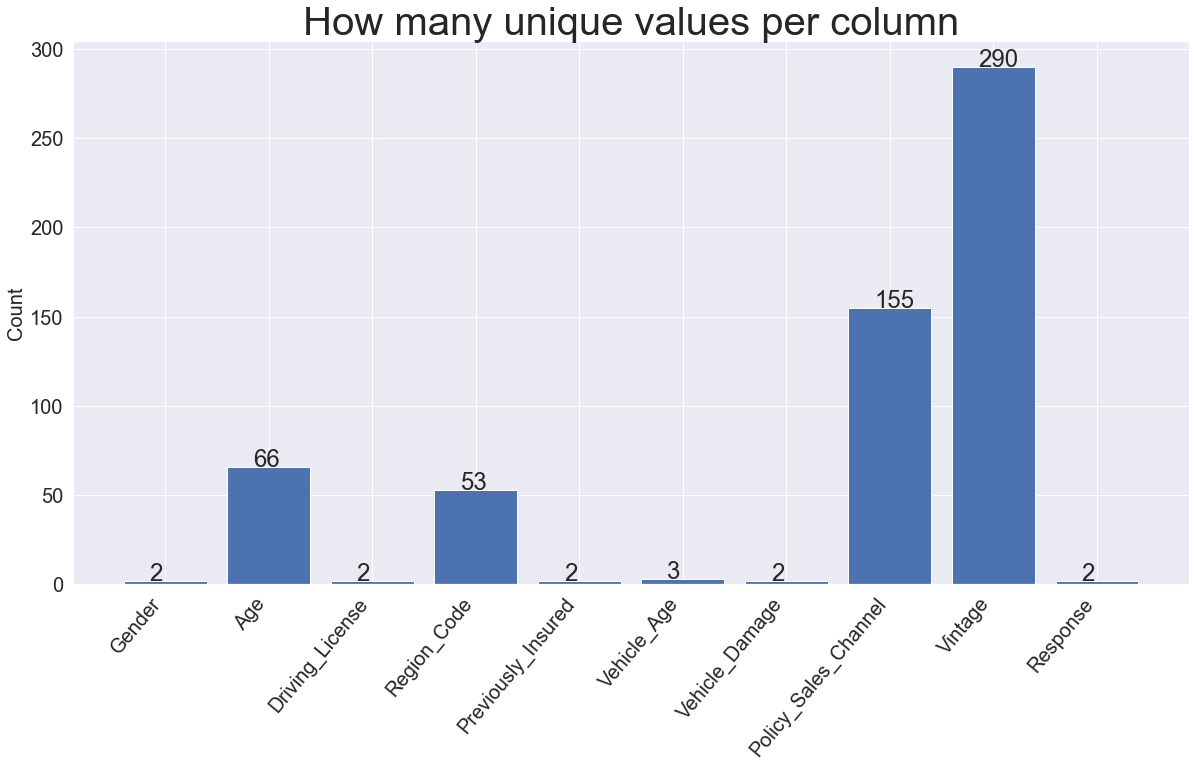

In [7]:
temp_dict = {}
for col in df.columns:
    if (col == 'Annual_Premium') | (col == 'id'):
        continue
    temp_dict[col] = df[col].unique().size
    
ax = plt.bar(temp_dict.keys(),temp_dict.values())
plt.title('How many unique values per column', fontsize=40)
plt.xticks(fontsize=20, horizontalalignment='right')
plt.yticks(fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.tick_params(axis='x', which='both', labelsize=20, labelbottom=True, rotation=50)
for i, col in enumerate(ax.patches):
    plt.text(col.get_x()+0.25, col.get_height(), list(temp_dict.values())[i]);

Another predictor that stuck out to us was Vintage, due to it’s extremely high Unique Value Count. Vintage is a term that is commonly associated with classic automobiles around the world. Upon inspection, we found that this column did not contain vehicle years, instead it appeared on the surface to just be arbitrary numbers. Further research showed that Vintage in the context of our data set was referring to the amount of time that a client has spent with the company referred to by the number of days. Without insight, this was extremely confusing to us. <br>

The Policy Sales Channel predictor also stuck out to us for this same reason, but after researching it further and keeping in mind that it is anonymized, we came to the conclusion that it would be beneficial to any individual outside of the company. 


In [8]:
df['Annual_Premium'].unique().size

48838

Annual_Premium was not included in the graph because it contains 48,838 unique values in the data set. Id was also not included.

<h1> Initial preprocessing and cleaning </h1>

Out of all the columns in the data set, the only continuous numeric variable in the data set is the Annual Premium. 

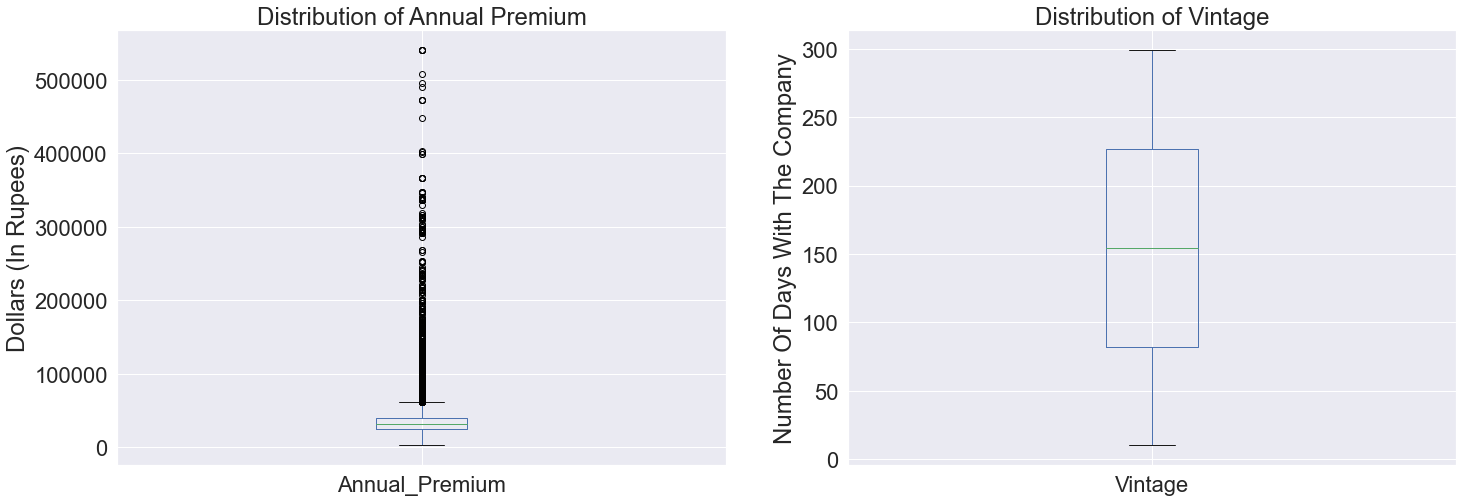

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

df['Annual_Premium'].plot.box(ax=ax1)
plt.sca(ax1)
plt.title('Distribution of Annual Premium')
plt.ylabel('Dollars (In Rupees)')
df['Vintage'].plot.box(ax=ax2)
plt.sca(ax2)
plt.title('Distribution of Vintage')
plt.ylabel('Number Of Days With The Company');

During our initial exploration of the data set, we found that the annual premium amounts were astoundingly high, with the mean being over 30,000. This prompted us to look into the predictor further, and we discovered that the client’s data set was actually based on information from India. Converted, the annual premium translates to around 400 (USD) dollars a year. <br>
Because the annual premium is in Rupees, having a maximum amount of 540,165 Rupees ($7,300 USD), is a high number but not completely unreasonable to the point that we may want to remove these outliers from our data set. <br> <br>
Looking into Vintage further with the boxplot, we found that the highest amount of time any customer has spent with the company was 299 days, with the lowest being 10 days. According to the source that we got the data set from, and keeping in mind that Vintage in the context of this set refers to the amount of time that a customer has spent with the company, we believe that this  implies all of the available data in the set is brand new customers to the company. 


In [10]:
pd.DataFrame(df.isna().mean(), index=df.columns, columns=['Percentage Missing'])

,Percentage Missing
id,0.0
Gender,0.0
Age,0.0
Driving_License,0.0
Region_Code,0.0
Previously_Insured,0.0
Vehicle_Age,0.0
Vehicle_Damage,0.0
Annual_Premium,0.0
Policy_Sales_Channel,0.0


There is no missing data in the data set

Because there is no missing data in the data set, there is very little preprocessing and cleaning that needs to happen. In further sections, we will be scaling our data in order of some of our classification algorithms to perform better. <br>
The column <b>id</b> is not useful so we will initially drop it

In [11]:
df.drop(columns=['id'], inplace=True)

<h1> Exploration and visualization </h1>

The graph below shows how many people are interested 

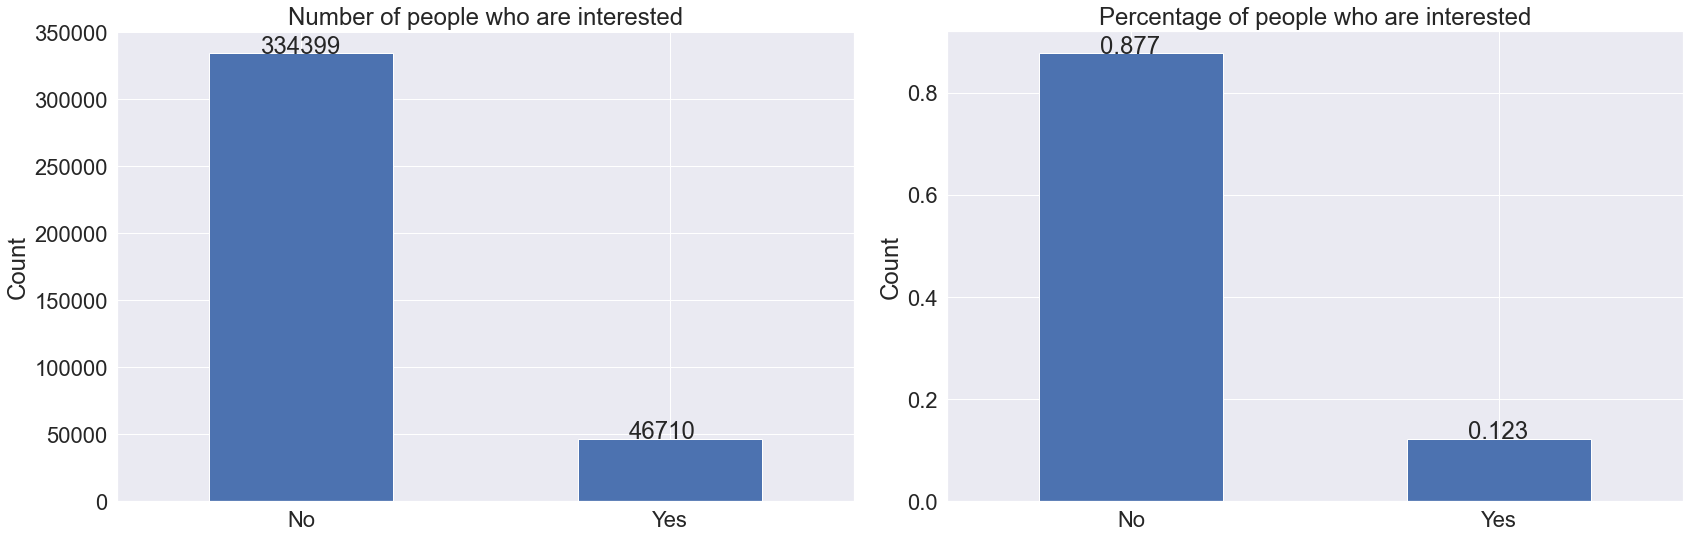

In [12]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
# Left plot
df['Response'].value_counts().plot.bar(ax=ax1)
ax1.set_title('Number of people who are interested')
plt.sca(ax1)
plt.xticks([0,1],('No', 'Yes'), rotation=0)
ax1.set_ylabel('Count')
for i, col in enumerate(ax1.patches):
    ax1.text(col.get_x()+0.14, col.get_height(), df['Response'].value_counts()[i].round(3))
# Right plot
df['Response'].value_counts(normalize=True).plot.bar(ax=ax2)
ax2.set_title('Percentage of people who are interested')
plt.sca(ax2)
plt.xticks([0,1],('No', 'Yes'), rotation=0)
ax2.set_ylabel('Count')
for i, col in enumerate(ax2.patches):
    ax2.text(col.get_x()+0.165, col.get_height(), df['Response'].value_counts(normalize=True)[i].round(3))
plt.tight_layout();

This data set is very imbalanced when it comes to the number of people who say they are interested and not interested. This will lead to issues within our models if we do not correct this. 

Below is a set of graphs that show the distributions of ages among males and female within the data set and also the distribution of ages for who said they are interested along with there counts.

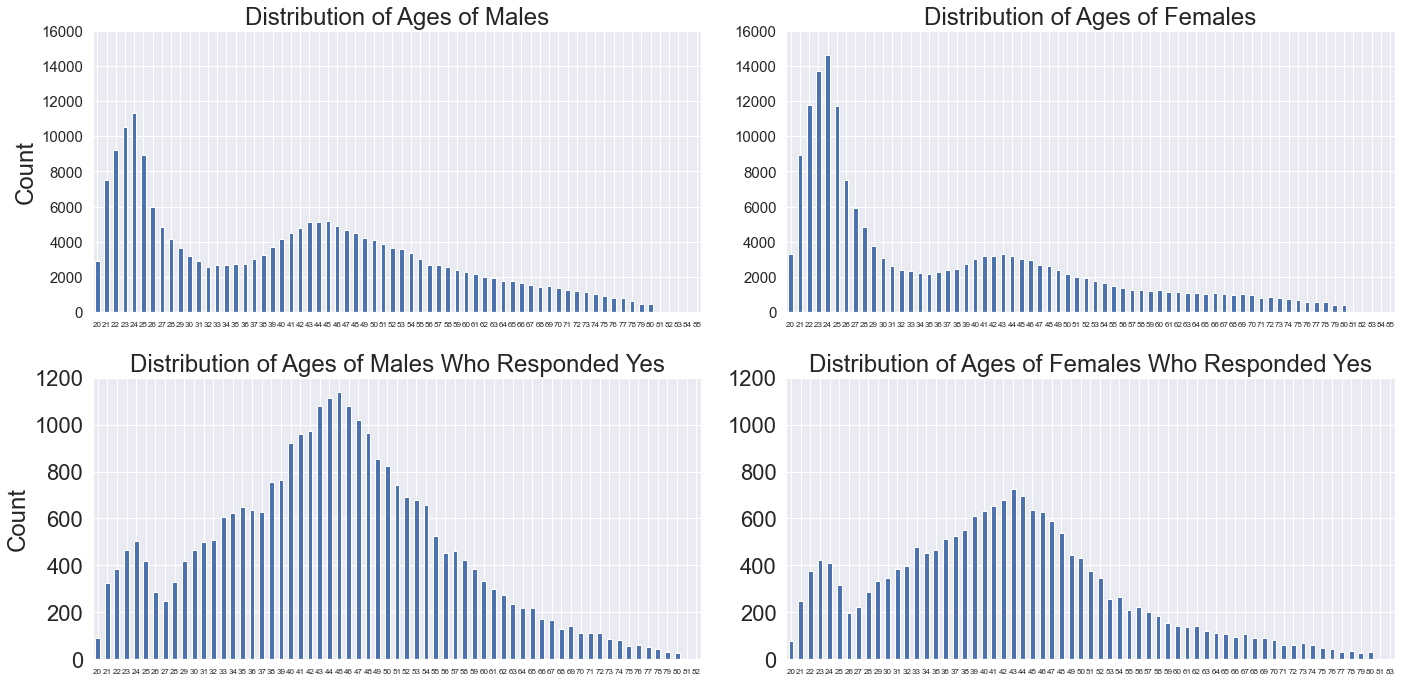

In [13]:
x_font_size = 8
y_font_size = 15
top_yticks = [0,2000,4000,6000,8000,10000,12000,14000,16000]
bottom_yticks = [0,200,400,600,800,1000,1200]

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False)
# Top left
df['Age'][df['Gender'] == 'Male'].value_counts(sort=False).plot.bar(ax = axs[0,0])
axs[0,0].set_title('Distribution of Ages of Males')
axs[0,0].set_ylabel('Count')
plt.sca(axs[0,0])
plt.xticks(fontsize = x_font_size, rotation=0) 
plt.yticks(top_yticks, fontsize = y_font_size)
# Top right
df['Age'][df['Gender'] != 'Male'].value_counts(sort=False).plot.bar(ax = axs[0,1])
axs[0,1].set_title('Distribution of Ages of Females')
plt.sca(axs[0,1])
plt.xticks(fontsize = x_font_size, rotation=0) 
plt.yticks(top_yticks, fontsize = y_font_size)
# Bottom left
df['Age'][(df['Gender'] == 'Male') & df['Response'] == 1].value_counts(sort=False).sort_index().plot.bar(ax = axs[1,0])
axs[1,0].set_title('Distribution of Ages of Males Who Responded Yes')
axs[1,0].set_ylabel('Count')
plt.sca(axs[1,0])
plt.xticks(fontsize = x_font_size, rotation=0) 
plt.yticks(bottom_yticks)
# Bottom right
df['Age'][(df['Gender'] != 'Male') & df['Response'] == 1].value_counts(sort=False).sort_index().plot.bar(ax = axs[1,1])
axs[1,1].set_title('Distribution of Ages of Females Who Responded Yes')
plt.sca(axs[1,1])
plt.xticks(fontsize = x_font_size, rotation=0) 
plt.yticks(bottom_yticks)
plt.tight_layout();

Some notable things about the graph above is that there are more younger females in the data set, around 25, than there are males. But more males, around the age of 45, said yes to being interested compared to females. 

This graph shows a greater detail on which age groups are saying yes and no to insurance. 

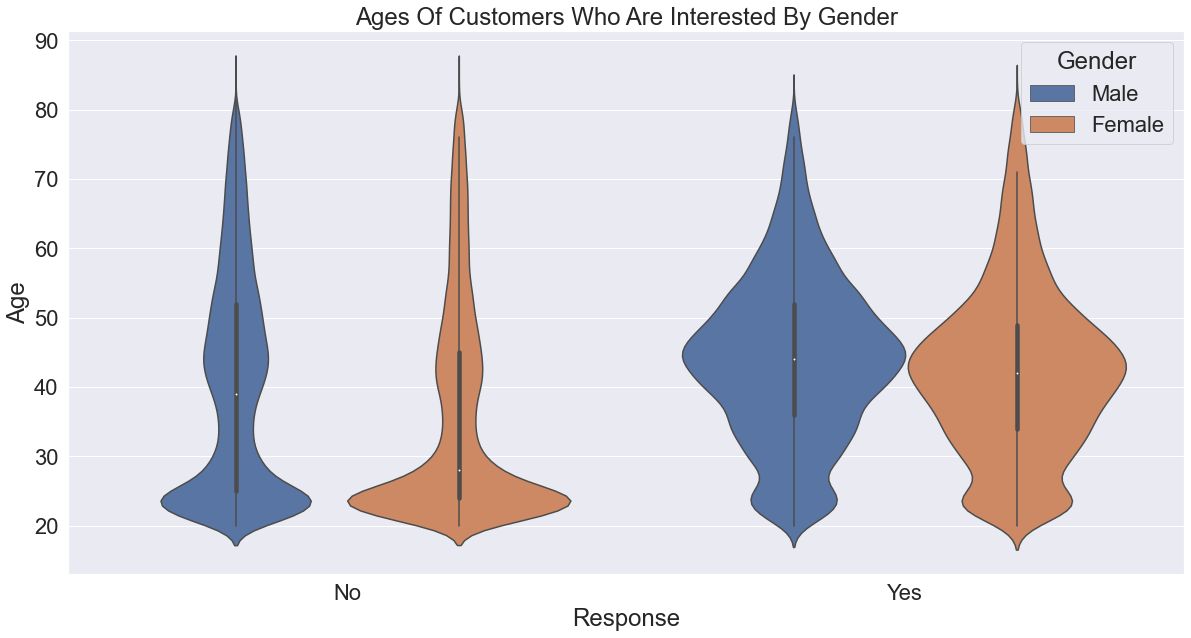

In [55]:
sns.violinplot(data=df, y='Age', x='Response', hue='Gender')
plt.title('Ages Of Customers Who Are Interested By Gender')
plt.xlabel('Response')
plt.xticks([0,1],('No', 'Yes'), rotation=0);

Most of the customers who said they are interested are in there mid 40's and most of the customers who said they are not interested are younger (in mid 20's). 

Below are bar plots of the annual premium and median premiums for each gender in the data set.

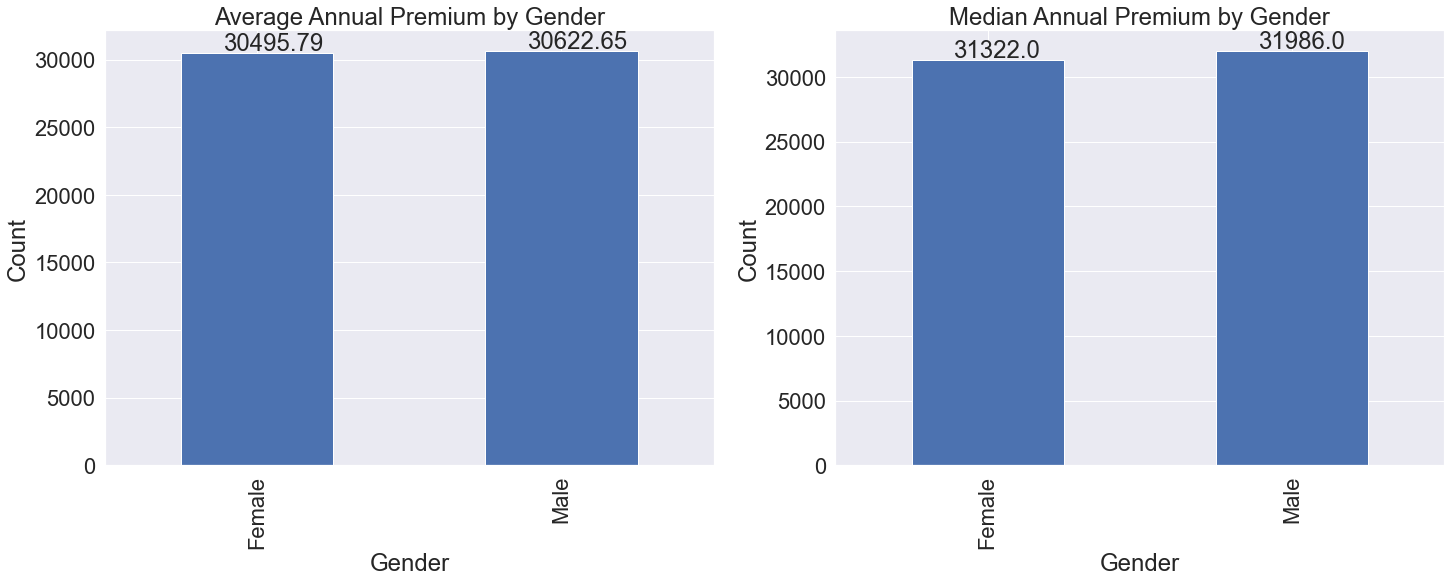

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
df.groupby(['Gender'])['Annual_Premium'].mean().plot.bar(ax=ax1)
for i, col in enumerate(ax1.patches):
    ax1.text(col.get_x()+.14, col.get_height() + 200, df.groupby(['Gender'])['Annual_Premium'].mean().round(2)[i])
plt.sca(ax1)
plt.title('Average Annual Premium by Gender')
plt.ylabel('Count')

df.groupby(['Gender'])['Annual_Premium'].median().plot.bar(ax=ax2)
for i, col in enumerate(ax2.patches):
    ax2.text(col.get_x()+.14, col.get_height() + 200, df.groupby(['Gender'])['Annual_Premium'].median().round(2)[i])
plt.sca(ax2)
plt.title('Median Annual Premium by Gender')
plt.ylabel('Count');

Below is a graph that shows the ages of customers with and how new there vehicles are by gender.

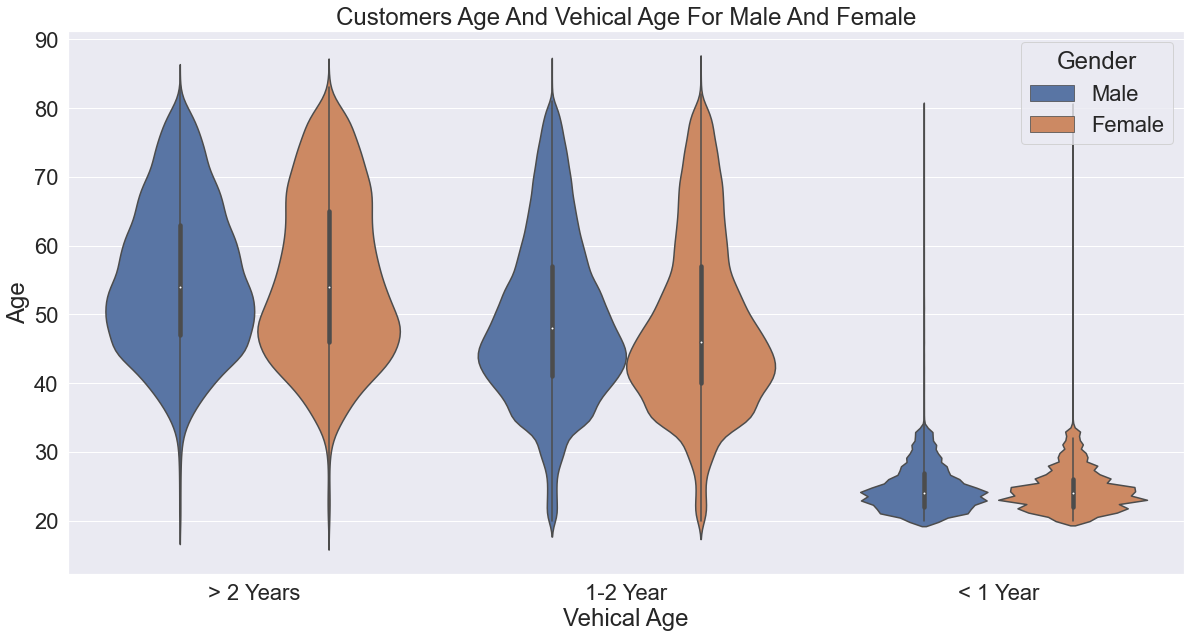

In [50]:
sns.violinplot(data=df, x='Vehicle_Age', y='Age', hue='Gender')
plt.title('Customers Age And Vehical Age For Male And Female')
plt.xlabel('Vehical Age');

This graph shows that customers with newer cars in this data set are a younger in age. 

The final visualization of data exploration is showing the ages of customers who are previously insured and there responses.

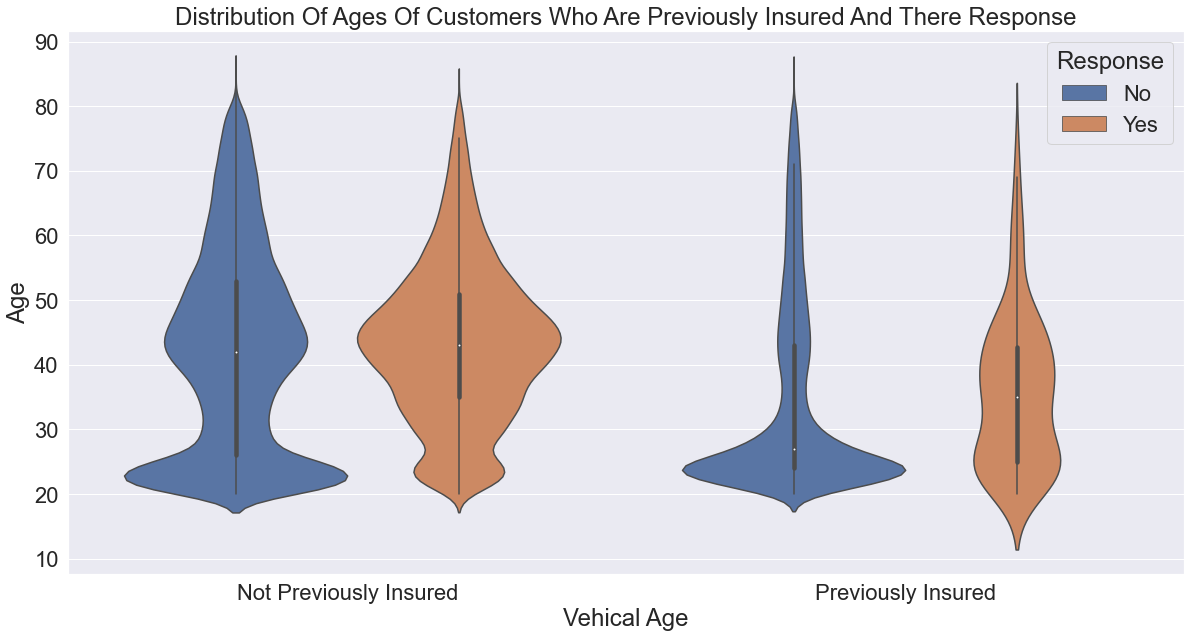

In [67]:
ax = sns.violinplot(data=df, x='Previously_Insured', y='Age', hue='Response')
plt.title('Distribution Of Ages Of Customers Who Are Previously Insured And There Response')
plt.xlabel('Vehical Age')
leg = ax.get_legend()
leg.set_title('Response')
new_labels = ['No', 'Yes']
plt.xticks([0,1],('Not Previously Insured', 'Previously Insured'), rotation=0)
for t, l in zip(leg.texts, new_labels): t.set_text(l)

The graph shows us that customers who are in there mid 40's and are not previously insured are more likely to respond to yes. Also, it looks like the younger customers consistently say no to being interested even if they were previously insured or not. 

<h1> Final preprocessing and cleaning </h1>

<b> Balancing the data set </b>

From the calculations above, there is a big imbalance of how many observations were observed to be not interested and how many were observed to be interested (12% of the observations were interested). In order to balance the data set, we are presented with a couple different options. 
1. Oversample the minority class
2. Undersample the majority class
3. Create synthetic data using SMOTE

Below we are going to pre-make four different data sets that we will be using for our models. 

<b>Four datas ets</b> <br>
    1. Data set converted all categorial values to numeric using dummy variables<br>
    2. Data set with dummy variables and scaled data<br>
    3. Data set converted all categorical values to numeric using encoders<br>
    4. Data set with encoded variables and scaled data<br>

<b> Data set 1 </b> <br>
Convert categorical data into dummy variables

In [15]:
df1 = df.copy() # Copy the original data set
df1 = pd.get_dummies(df1, drop_first=True)
df1.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


<b> Data set 2 </b> <br>
Convert categorical data into dummy variables and scale the data

In [16]:
df2 = df1.copy() # Copy the first data set
min_max_scaler = MinMaxScaler()
columns = ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']
df2[columns] = min_max_scaler.fit_transform(df2[columns])
df2.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,0.369231,1,0.538462,0,0.070366,0.154321,0.716263,1,1,0,1,1
1,0.861538,1,0.057692,0,0.057496,0.154321,0.598616,0,1,0,0,0
2,0.415385,1,0.538462,0,0.066347,0.154321,0.058824,1,1,0,1,1
3,0.015385,1,0.211538,1,0.048348,0.932099,0.667820,0,1,1,0,0
4,0.138462,1,0.788462,1,0.046259,0.932099,0.100346,0,0,1,0,0


<b> Data set 3 </b> <br>
Convert categorical data using label encoding

In [17]:
# Create encoder objects
le_gender = LabelEncoder()
le_va = LabelEncoder()
le_vd = LabelEncoder()

df3 = df.copy() 

# Encode all the columns that are strings
df3['Gender_n'] = le_gender.fit_transform(df3['Gender'])
df3['Vehicle_Age_n'] = le_va.fit_transform(df3['Vehicle_Age'])
df3['Vehicle_Damage_n'] = le_vd.fit_transform(df3['Vehicle_Damage'])
    
# Drop all the old columns 
df3 = df3.drop(['Gender','Vehicle_Age','Vehicle_Damage'], axis='columns')
df3.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_n,Vehicle_Age_n,Vehicle_Damage_n
0,44,1,28.0,0,40454.0,26.0,217,1,1,2,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,2,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0


<b> Data set 4 </b> <br>
Convert categorical data using label encoding and scaled data

In [18]:
df4 = df3.copy()
df4[columns] = min_max_scaler.fit_transform(df4[columns])
df4.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_n,Vehicle_Age_n,Vehicle_Damage_n
0,0.369231,1,0.538462,0,0.070366,0.154321,0.716263,1,1,2,1
1,0.861538,1,0.057692,0,0.057496,0.154321,0.598616,0,1,0,0
2,0.415385,1,0.538462,0,0.066347,0.154321,0.058824,1,1,2,1
3,0.015385,1,0.211538,1,0.048348,0.932099,0.667820,0,1,1,0
4,0.138462,1,0.788462,1,0.046259,0.932099,0.100346,0,0,1,0


<h1> Machine Learning </h1>

The machine learning algorithms we are going to be using will be categorical naive bayes and categorical classification trees. We decided to chose these two algorithms because they are both fast and easy to train with the large amount of data we have.

<h2> Naive Bayes </h2>

The first algorithm we used is Naive Bayes. In particular, categorical Naive Bayes. Naive Bayes is also good for determining a baseline to compare other classifier algorithms too. For each of our algorithms, we will be showing the differences in using using an unbalanced data set, and balanced data set. The two balancing methods we use are SMOTE (Synthetic Minority Over-sampling Technique) and undersampling the majority class.

<h3>Un-balanced Data set </h3>

Below we show what happens when we have a very imbalanced training set

In [19]:
# This function is used to graph the different metrics of our different machine learning models

def graphMLModels(model, name_of_model, scores=False, balanced=None):
    fig, axs = plt.subplots(2, 4, sharex=False, sharey=False)
    labels = ['Accuracy', 'Precision', 'Recall', 'F-score', 'AUC']
    scores_list = []

    # Loop through the 5 data sets
    for i in range(1,5):
        scores = []
        target = 'Response'
        if i == 1:  
            predictors = df1.columns[df1.columns != 'Response']
            X = df1[predictors] 
            y = df1[target]   
            model_num = 'one'
        elif i == 2:
            predictors = df2.columns[df2.columns != 'Response']
            X = df2[predictors] 
            y = df2[target]  
            model_num = 'two'
        elif i == 3:
            predictors = df3.columns[df3.columns != 'Response']
            X = df3[predictors] 
            y = df3[target]   
            model_num = 'three'
        else: # i == 4
            predictors = df4.columns[df4.columns != 'Response']
            X = df4[predictors] 
            y = df4[target]   
            model_num = 'four'

        # Split the data
        X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

        if (balanced == 'Undersample'):
            # Join the training sets together again
            temp_df = X_train_temp.join(y_train_temp)
            # Get all the rows where the response is 1
            minority_rows = temp_df[temp_df['Response'] == 1]
            # Get the count of those rows
            minority_count = minority_rows.shape[0]
            # Get a sample of the observations in the data set that indicate they are not interested
            majority_rows = temp_df[temp_df['Response'] == 0].sample(minority_count, replace=False, random_state=0)
            # Join the two sets together
            df_balanced = pd.concat([majority_rows, minority_rows])
            # Shuffle the observations
            df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
            # Remove the response from the balanced data set
            X_train = df_balanced[df_balanced.columns[df_balanced.columns != 'Response']]
            y_train = df_balanced['Response']
        elif (balanced == 'SMOTE'):
            # Use SMOTE to upsample the training data
            smt = SMOTE(n_jobs=-1)
            X_train, y_train = smt.fit_sample(X_train_temp, y_train_temp)
        else: # Unbalanced Data
            X_train, y_train = X_train_temp, y_train_temp
            balanced = 'Unbalanced'
        
        # Create and train the model
        clf = model
        clf.fit(X_train, y_train)

        # Make predictions
        y_predict = clf.predict(X_test)

        # Add the scores to the list
        scores.append(accuracy_score(y_test, y_predict).round(4))
        scores.append(precision_score(y_test, y_predict).round(4))
        scores.append(recall_score(y_test, y_predict).round(4))
        scores.append(f1_score(y_test, y_predict).round(4))
        scores.append(roc_auc_score(y_test, y_predict).round(4))
        scores_list.append(scores)

        # Graph metrics
        axs[0,i-1].bar(labels,scores)
        axs[0,i-1].set_title('Data set {}'.format(model_num))
        axs[0,i-1].tick_params(axis='x', labelsize=20, rotation=50)
        axs[0,i-1].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])

        # Graph confusion matrix
        mat = confusion_matrix(y_test, y_predict) # Confusion Matrix
        sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=['False','True'], yticklabels=['False','True'], ax=axs[1,i-1])
        axs[1,i-1].set_title('Predicted')
        axs[1,i-1].set_ylabel('Actual')

    # Show the results
    plt.suptitle('{} Performance For Each Data Set ({})'.format(name_of_model, balanced), fontsize=40)
    plt.tight_layout()
    plt.show()
    
    # Return the scores if we want
    if scores:
        return scores_list

For each of the metrics we will be showing for each model, we decided to show the accuracy, precision, recall, f-score, and Area Under Curve (AUC) in order to gauge how well our models are performing. The three metrics we will be paying the most attention too are the precision, recall, and f-score. The accuracy and AUC are things we not as concerned about improving because they are easily influenced when we have a large true negative amount. <br><br>
First, we will be testing Naive Bayes with unbalanced training data

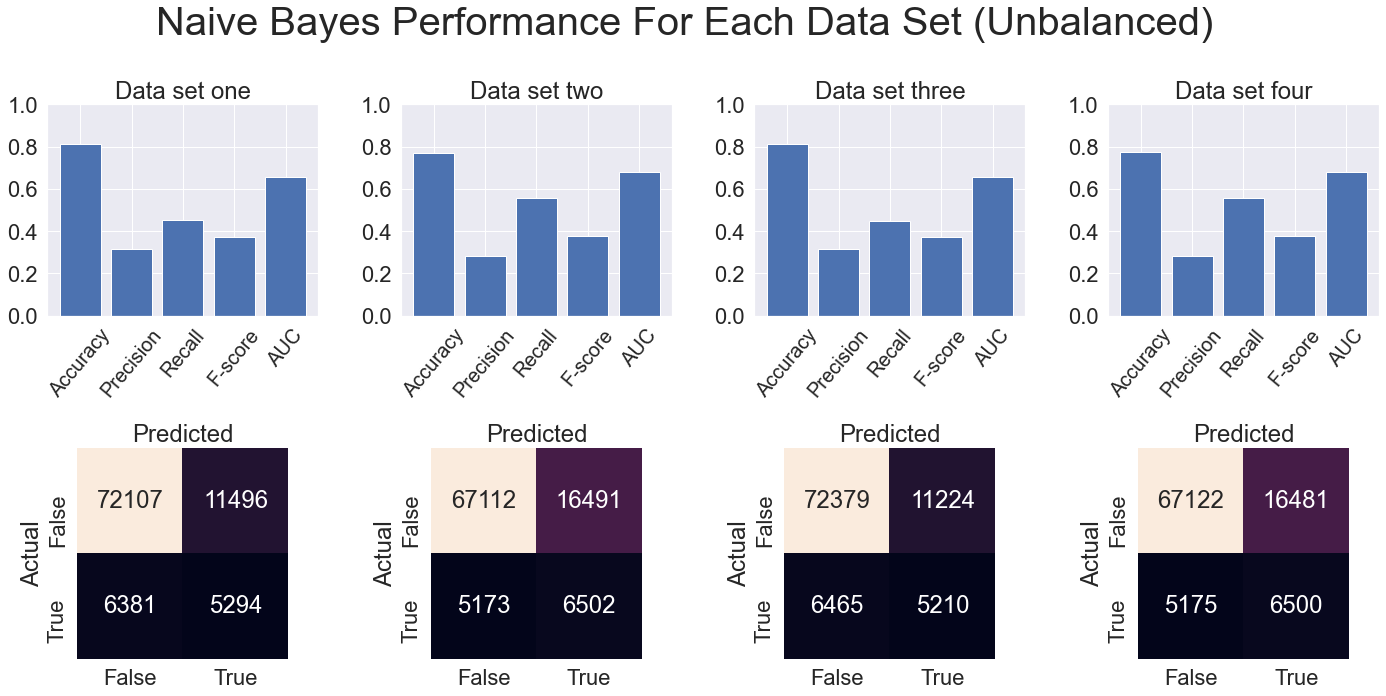

In [20]:
scores_list_ub = graphMLModels(CategoricalNB(), 'Naive Bayes', scores=True)

The metrics from each of the four data sets we created did not produce very good results. All the models produced decent accuracy <b>but</b>, accuracy is not what we are concerned about. Recall and precision scores is what is most useful to know from a business prospective. 

Next, we are going to compute the best metrics for each of the data sets and the average metrics between them.

In [21]:
average_scores_list = [] # List for keeping track of all the average scores

In [22]:
# This function will allow us to print out the best data set for each metric after testing our models

def getMetrics(scores_list):
    temp_scores = []
    average_accuracy = 0
    average_precision = 0
    average_recall = 0
    average_fscore = 0
    average_auc = 0
    for y in range(4):
        for x in range(5):
            if x == 0:
                average_accuracy += scores_list[y][x]
            if x == 1:
                average_precision += scores_list[y][x]
            if x == 2:
                average_recall += scores_list[y][x]
            if x == 3:
                average_fscore += scores_list[y][x]
            if x == 4:
                average_auc += scores_list[y][x]

    # Add the averages to compare later
    temp_scores.append((average_accuracy / 4))
    temp_scores.append((average_precision / 4))
    temp_scores.append((average_recall / 4))
    temp_scores.append((average_fscore / 4))
    temp_scores.append((average_auc / 4))

    print("Highest Accuracy: \t{} Data Set {}".format(max(np.array(scores_list)[:,0]), np.where(np.array(scores_list)[:,0] == max(np.array(scores_list)[:,0]))[0][0] + 1))
    print("Highest Precision: \t{} Data Set {}".format(max(np.array(scores_list)[:,1]), np.where(np.array(scores_list)[:,1] == max(np.array(scores_list)[:,1]))[0][0] + 1))
    print("Highest Recall: \t{} Data Set {}".format(max(np.array(scores_list)[:,2]), np.where(np.array(scores_list)[:,2] == max(np.array(scores_list)[:,2]))[0][0] + 1))
    print("Highest F-Score: \t{} Data Set {}".format(max(np.array(scores_list)[:,3]), np.where(np.array(scores_list)[:,3] == max(np.array(scores_list)[:,3]))[0][0] + 1))
    print("Highest AUC: \t\t{} Data Set {}".format(max(np.array(scores_list)[:,4]), np.where(np.array(scores_list)[:,4] == max(np.array(scores_list)[:,4]))[0][0] + 1))

    print("Average accuracy: \t{:.2f}%".format((average_accuracy / 4)*100))
    print("Average precision: \t{:.2f}%".format((average_precision / 4)*100))
    print("Average recall: \t{:.2f}%".format((average_recall / 4)*100))
    print("Average f-score: \t{:.2f}%".format((average_fscore / 4)*100))
    print("Average AUC: \t\t{:.2f}%".format((average_auc / 4)*100))
    
    return temp_scores

In [23]:
temp_scores = getMetrics(scores_list_ub)
average_scores_list.append(temp_scores)

Highest Accuracy: 	0.8143 Data Set 3
Highest Precision: 	0.317 Data Set 3
Highest Recall: 	0.5569 Data Set 2
Highest F-Score: 	0.3751 Data Set 2
Highest AUC: 		0.6798 Data Set 2
Average accuracy: 	79.30%
Average precision: 	29.95%
Average recall: 	50.33%
Average f-score: 	37.32%
Average AUC: 		66.84%


With an unbalanced training set, our accuracy is decent but the metrics we are most interesting in improving are not. Our average recall score was around 50% and the precision around 30%. Data set 3 produced the highest precision score of 31% and data set 2 produced the highest recall, f-score, and AUC scores. 

<h3>Balanced Data sets </h3> 
<b>SMOTE</b> <br>
Next, we will show how much of a difference balancing the training set of data will improve the overall models. The first balancing technique we are going to be using is SMOTE. SMOTE works by up-sampling the minority class by creating synthetic data using a kNN algorithm that picks a random point in the minority class and creates a new observation using the averages of that points neighbors who are also in the minority class. We only apply SMOTE to the training data and not the whole data set.  

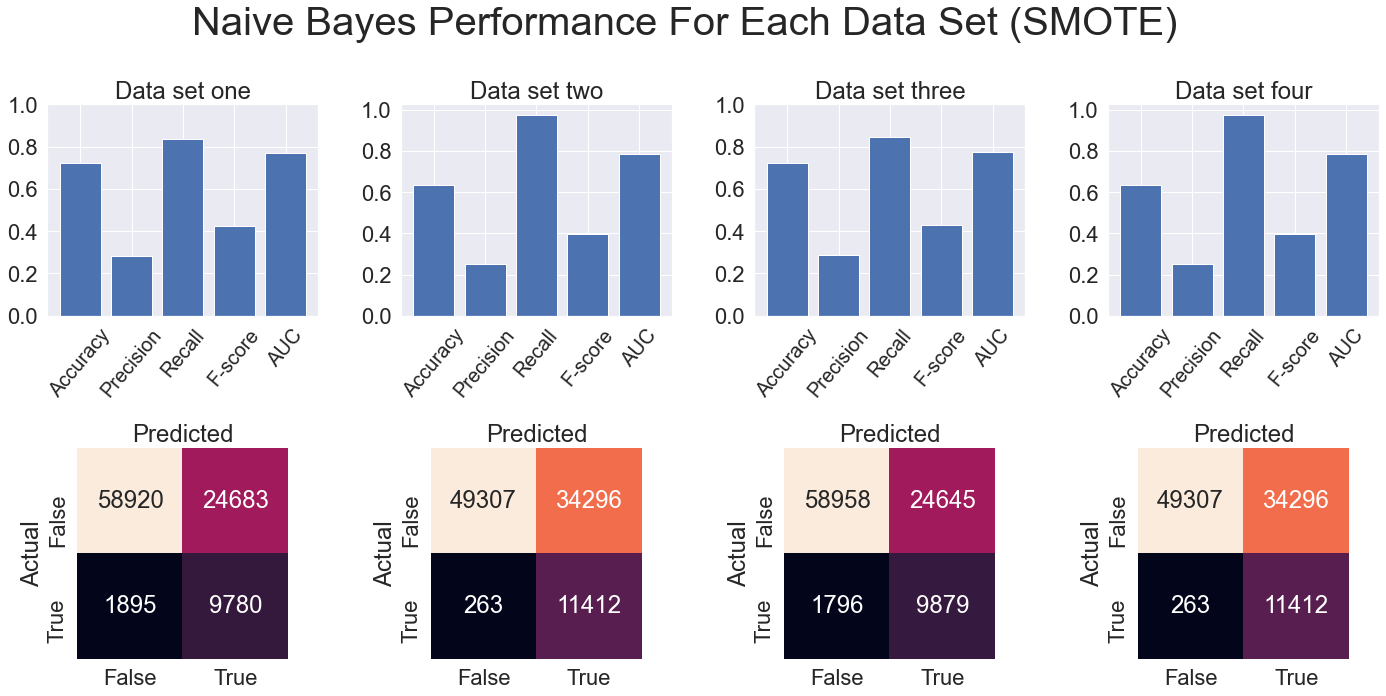

In [24]:
scores_list_smote = graphMLModels(CategoricalNB(), 'Naive Bayes', scores=True, balanced='SMOTE')

Data sets 2 and 4 produced a really low false negatives but also has really high false positives. 

In [25]:
temp_scores = getMetrics(scores_list_smote)
average_scores_list.append(temp_scores)

Highest Accuracy: 	0.7225 Data Set 3
Highest Precision: 	0.2861 Data Set 3
Highest Recall: 	0.9775 Data Set 2
Highest F-Score: 	0.4277 Data Set 3
Highest AUC: 		0.7836 Data Set 2
Average accuracy: 	67.95%
Average precision: 	26.73%
Average recall: 	90.97%
Average f-score: 	41.17%
Average AUC: 		77.85%


Compared to the performance of the last models, the highest recall, f-score, and AUC increased (with the recall being the most significant increase). And the highest accuracy and precision decreased.

<b>Undersampling the majority class</b>

The next balancing technique used is to undersample the majority class. We do this by randomly selecting enough observations in the majority class to match the minority class in the training data. This allows us to have an equal amount of target responses in our training data. 

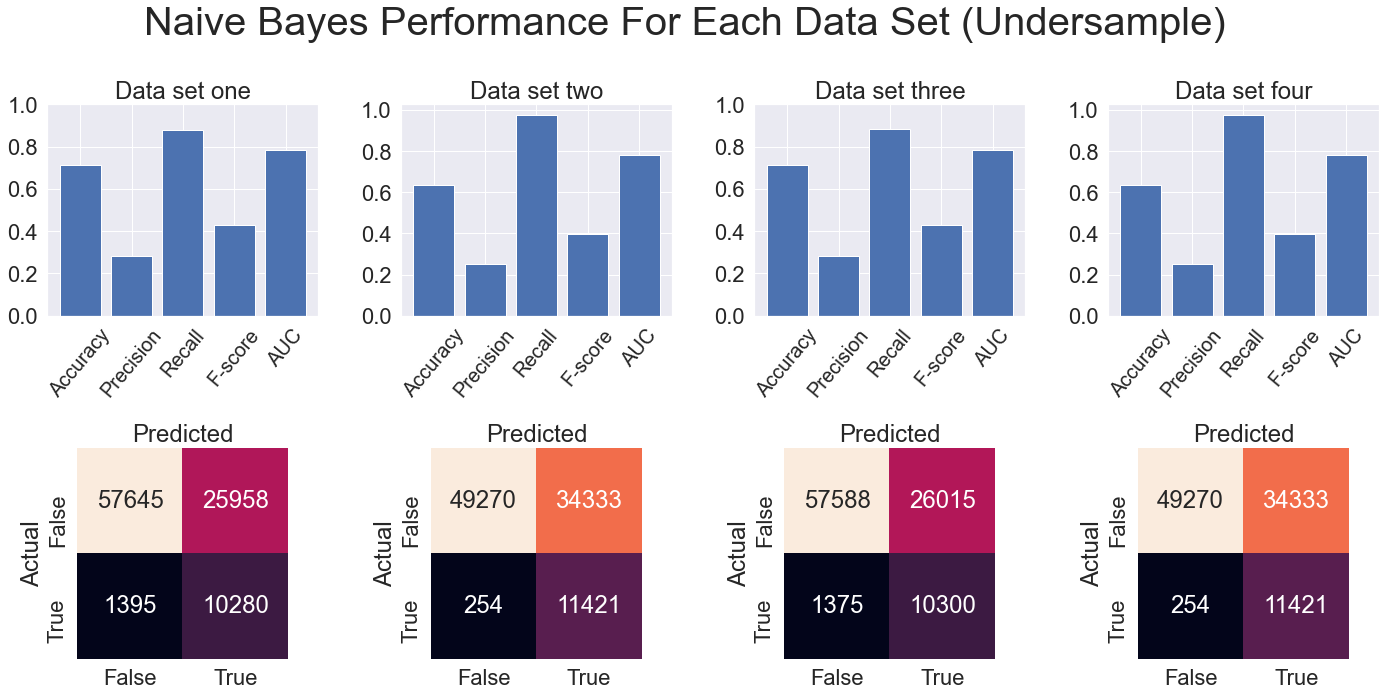

In [26]:
scores_list_us = graphMLModels(CategoricalNB(), 'Naive Bayes', scores=True, balanced='Undersample')

Similar to using SMOTE, data sets two and four also produced a really low false negatives but also has really high false positives. 

In [27]:
temp_scores = getMetrics(scores_list_us)
average_scores_list.append(temp_scores)

Highest Accuracy: 	0.7129 Data Set 1
Highest Precision: 	0.2837 Data Set 1
Highest Recall: 	0.9782 Data Set 2
Highest F-Score: 	0.4293 Data Set 3
Highest AUC: 		0.7855 Data Set 3
Average accuracy: 	67.48%
Average precision: 	26.66%
Average recall: 	92.98%
Average f-score: 	41.34%
Average AUC: 		78.45%


When undersamping the majority class, we were able to slightly improve the recall, f-score, and AUC compared to using SMOTE.

Below is three graphs comparing the averages all the metrics for each of the balancing technique.

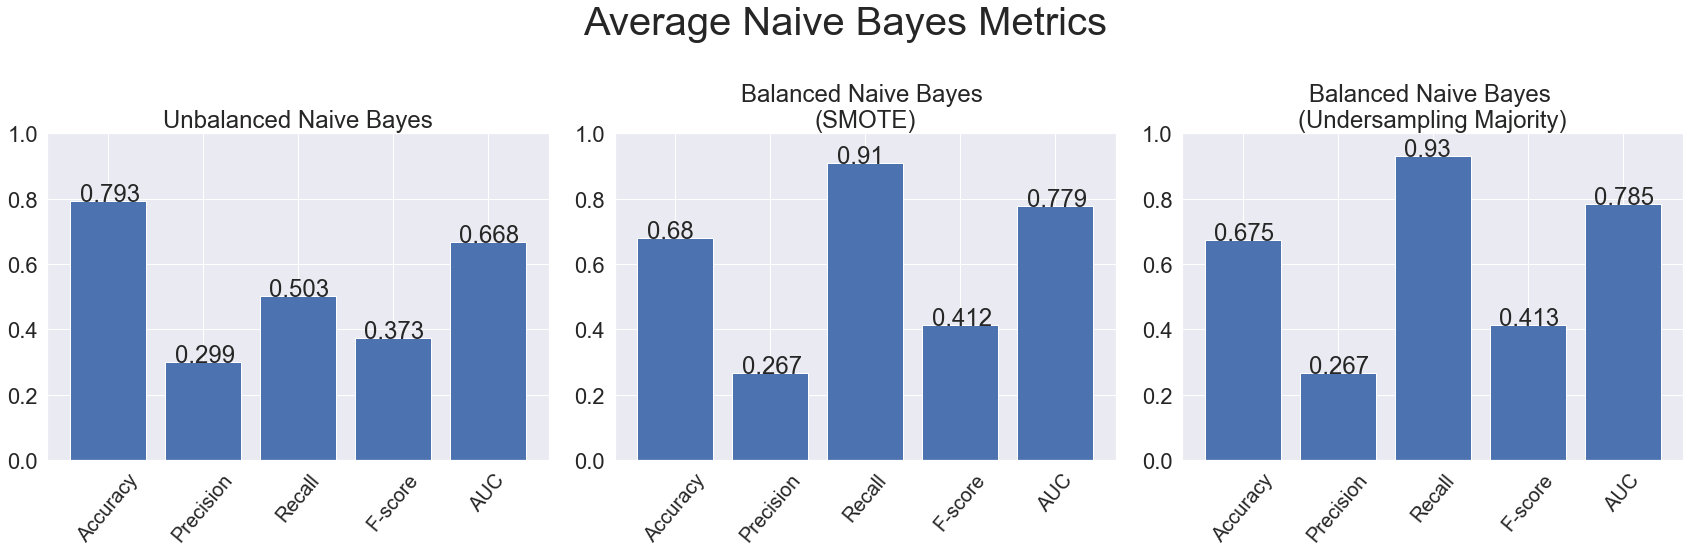

In [28]:
labels = ['Accuracy', 'Precision', 'Recall', 'F-score', 'AUC']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

ax1.bar(labels,average_scores_list[0])
for i, col in enumerate(ax1.patches):
    ax1.text(col.get_x()+0.1, col.get_height(), average_scores_list[0][i].round(3))
ax1.tick_params(axis='x', labelsize=20, rotation=50)
ax1.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax1.set_title('Unbalanced Naive Bayes')
    
ax2.bar(labels,average_scores_list[1])
for i, col in enumerate(ax2.patches):
    ax2.text(col.get_x()+0.1, col.get_height(), average_scores_list[1][i].round(3))
ax2.tick_params(axis='x', labelsize=20, rotation=50)
ax2.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax2.set_title('Balanced Naive Bayes \n(SMOTE)')
    
ax3.bar(labels,average_scores_list[2])
for i, col in enumerate(ax3.patches):
    ax3.text(col.get_x()+0.1, col.get_height(), average_scores_list[2][i].round(3))
ax3.tick_params(axis='x', labelsize=20, rotation=50)
ax3.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax3.set_title('Balanced Naive Bayes \n(Undersampling Majority)')

plt.suptitle('Average Naive Bayes Metrics', fontsize=40)
plt.tight_layout();

While both balancing methods offered similar results, undersampling the majority produced slightly better results for the recall score. <br>
Looking back at which of the four data  sets when using the undersampling technique, data set 2 (df2) produced the highest recall score. <br>
Next, we are going to try to improve the precision of our Naive Bayes model, using data set 2, by applying a threshold on the probability.

These graphs gives us a better insight on the relationship between adjusting the threshold and the different metrics. 

In [29]:
def ClassificationProbThreshold(model, dataframe, predictors, target, threshold=0.5):
    
    # Split the data 75% train, 25% test
    X_train_temp, X_test, y_train_temp, y_test = train_test_split(dataframe[predictors], dataframe[target], test_size=0.25, random_state=0)
    
    #X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    # Join the training sets together again
    temp_df = X_train_temp.join(y_train_temp)

    # Get all the rows where the response is 1
    minority_rows = temp_df[temp_df['Response'] == 1]
    # Get the count of those rows
    minority_count = minority_rows.shape[0]
    # Get a sample of the observations in the data set that indicate they are not interested
    majority_rows = temp_df[temp_df['Response'] == 0].sample(minority_count, replace=False, random_state=0)
    # Join the two sets together
    df_balanced = pd.concat([majority_rows, minority_rows])
    # Shuffle the observations
    df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
    # Remove the response from the balanced data set
    X_train = df_balanced[df_balanced.columns[df_balanced.columns != 'Response']]
    y_train = df_balanced['Response']
    
    # Create the Classification Object
    clf = model
    
    # Train the data
    clf.fit(X_train, y_train)
    # Make predictions
    predictions = clf.predict(X_test)

    # Create probabilities
    prob = clf.predict_proba(X_test)[:,1]
    y_predict = (prob > threshold).astype(int)
    
    cm = confusion_matrix(y_test, y_predict) 
    # Create the precision and recall
    if (cm[0,1] + cm[1,1]) == 0:
        precision = 0
    else:
        precision = cm[1,1] / (cm[0,1] + cm[1,1])
    if (cm[1,0] + cm[1,1]) == 0:
        recall = 0
    else:
        recall = cm[1,1] / (cm[1,0] + cm[1,1])
    
    return precision, recall, f1_score(y_test, y_predict).round(4)

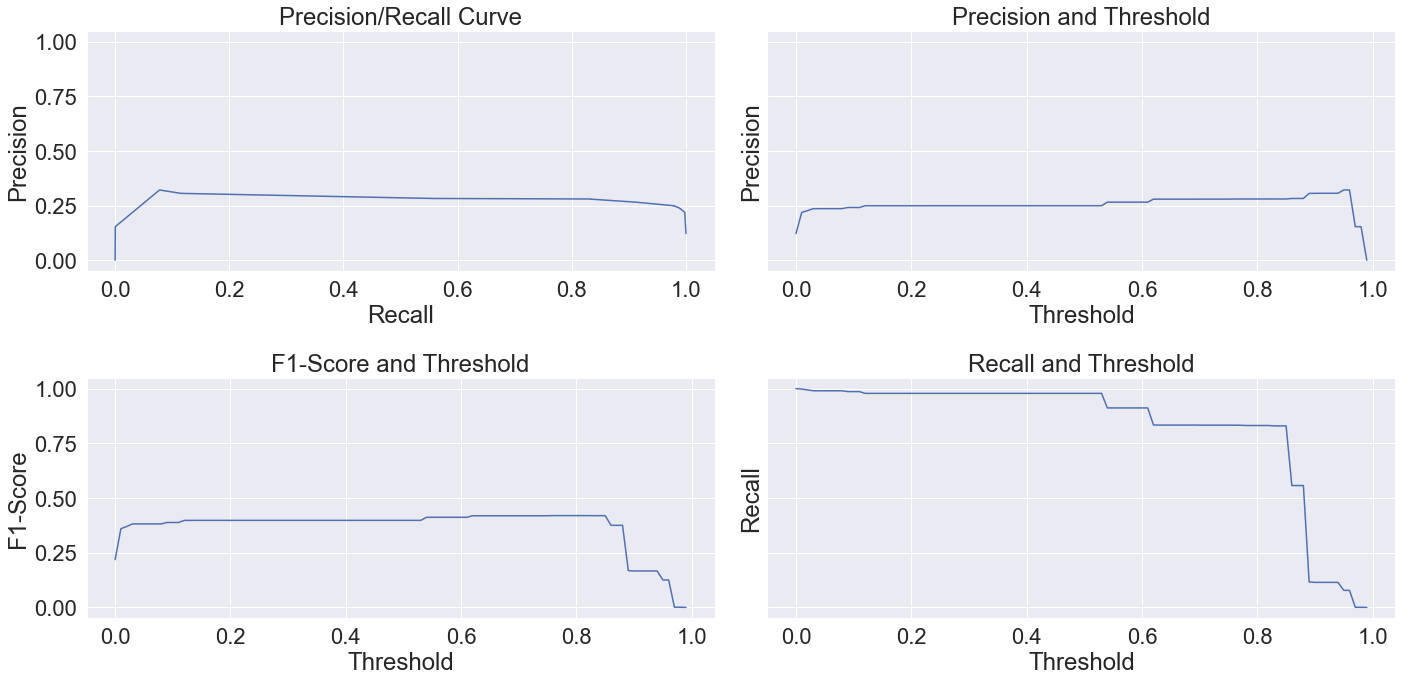

In [30]:
precision_list = []
recall_list = []
f1_list = []

# Loop through all the thresholds from 0.00 to 0.99
for i in range(0,100):
    p, r, f1 = ClassificationProbThreshold(CategoricalNB(), df2, df2.columns[df2.columns != 'Response'], 'Response', threshold=i/100)
    precision_list.append(p)
    recall_list.append(r)
    f1_list.append(f1)

threshold_list = np.arange(0,100) / 100
fig, axs = plt.subplots(2, 2, sharey=True)
axs[0, 0].plot(recall_list, precision_list)
axs[0, 0].set_title('Precision/Recall Curve')
axs[0, 0].set_xlabel('Recall')
axs[0, 0].set_ylabel('Precision')
axs[0, 1].plot(threshold_list, precision_list)
axs[0, 1].set_title('Precision and Threshold')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_xlabel('Threshold')
axs[1, 0].plot(threshold_list, f1_list)
axs[1, 0].set_title('F1-Score and Threshold')
axs[1, 0].set_ylabel('F1-Score')
axs[1, 0].set_xlabel('Threshold')
axs[1, 1].plot(threshold_list, recall_list)
axs[1, 1].set_title('Recall and Threshold')
axs[1, 1].set_xlabel('Threshold')
axs[1, 1].set_ylabel('Recall')
plt.tight_layout();

Our precision and recall curve never reaches the top left corner because our precision never goes to 100% even as we adjust the threshold from 0 to 99%. Even as we manually adjust our threshold value, our precision never goes higher than around 30-35% or so. 

<b>Finding the best threshold<b>

To find the best threshold, we will get the threshold at the highest F-Score using the second data set (df2) and undersampling the majority class. We are using f-score as our metric to improve because it combines both the precision and recall scores and will give us a balance between the both of them.

Because our threshold values goes from 0.00 to 0.99, this allows us to be able to find the index of the max f-score and use that location as our best threshold

In [31]:
thresh = np.where(max(f1_list) == f1_list)[0][0]
print("The threshold with the highest f-score:",thresh)

The threshold with the highest f-score: 76


The threshold of 0.76 gave us the best f-score. Below we will now create our last Naive Bayes model with the new threshold

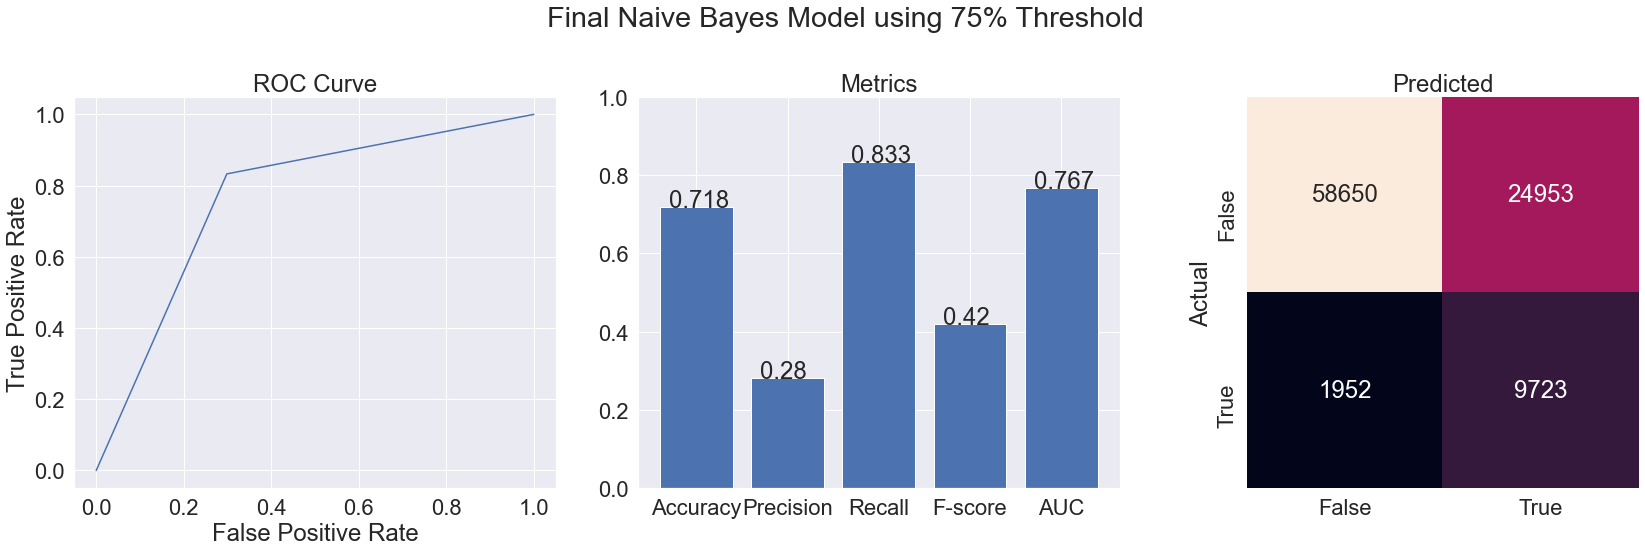

In [32]:
target = 'Response'
labels = ['Accuracy', 'Precision', 'Recall', 'F-score', 'AUC']
scores = []

predictors = df2.columns[df2.columns != 'Response']
X = df2[predictors] 
y = df2[target] 

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Join the training sets together again
temp_df = X_train_temp.join(y_train_temp)

# Get all the rows where the response is 1
minority_rows = temp_df[temp_df['Response'] == 1]
# Get the count of those rows
minority_count = minority_rows.shape[0]
# Get a sample of the observations in the data set that indicate they are not interested
majority_rows = temp_df[temp_df['Response'] == 0].sample(minority_count, replace=False, random_state=0)
# Join the two sets together
df_balanced = pd.concat([majority_rows, minority_rows])
# Shuffle the observations
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
# Remove the response from the balanced data set
X_train = df_balanced[df_balanced.columns[df_balanced.columns != 'Response']]
y_train = df_balanced['Response']

# Create and train the model
clf = CategoricalNB()
clf.fit(X_train.values, y_train.values)

# Predictions and probability of all predictions
threshold = 0.76
prob = clf.predict_proba(X_test.values)[:,1]
y_predict = (prob > threshold).astype(int)

# Code for ROC curve
fpr, tpr, _ = roc_curve(y_test.values, y_predict)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Add all the metrics scores to a list to graph 
scores.append(accuracy_score(y_test, y_predict).round(4))
scores.append(precision_score(y_test, y_predict).round(4))
scores.append(recall_score(y_test, y_predict).round(4))
scores.append(f1_score(y_test, y_predict).round(4))
scores.append(roc_auc_score(y_test, y_predict).round(4))

# Plot both
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
roc_display.plot(ax=ax1) # ROC
ax2.bar(labels,scores)
for i, col in enumerate(ax2.patches):
    ax2.text(col.get_x()+0.1, col.get_height(), scores[i].round(3))
ax2.set_title('Metrics')
ax2.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
mat = confusion_matrix(y_test, y_predict) # Confusion Matrix
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['False','True'], yticklabels=['False','True'], 
            ax=ax3)
ax1.set_title('ROC Curve')
ax3.set_title('Predicted')
ax3.set_ylabel('Actual')
plt.suptitle('Final Naive Bayes Model using 75% Threshold')
plt.tight_layout();

The final Naive Bayes model has correctly predicted 9,723 people who are interested in car insurance (True Positive) but incorrectly guessed 1,952 people who are actually interested (False Positive). There was also around 25k customers who the model said are interested but are actually not. 

<h2> Classification Tree </h2>

After implementing the naïve bayes algorithm, the next machine learning algorithm we are implementing is the classification tree. We approached the classification tree in the same as the naïve bayes algorithm when trying to determine which data set and balancing technique would yield the best overall metrics.

First, we show the metrics using an unbalanced data for each data set.

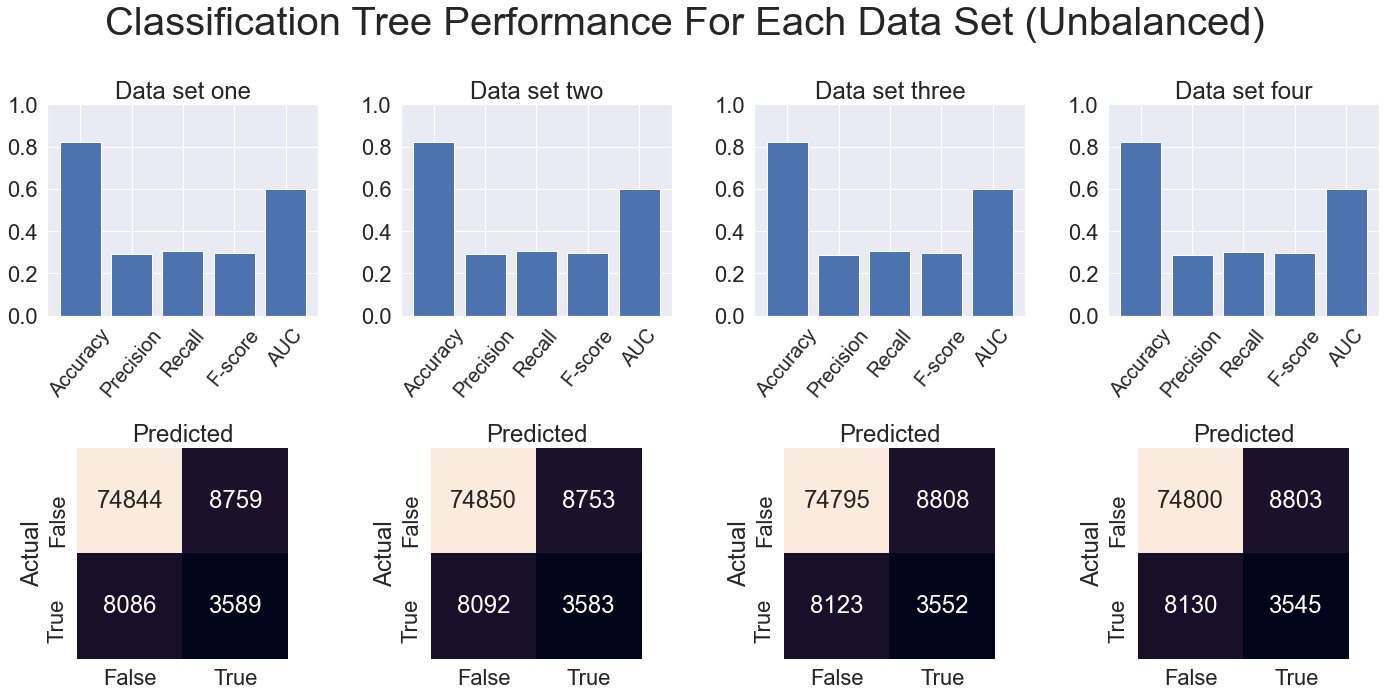

In [33]:
graphMLModels(DecisionTreeClassifier(random_state=0), 'Classification Tree');

For each data set, we our accuracy is pretty good (above 80%) but our true positive and false negatives are both really high which is leading us to have low precision, recall, and f-score. 

Next, we balance the data sets using SMOTE

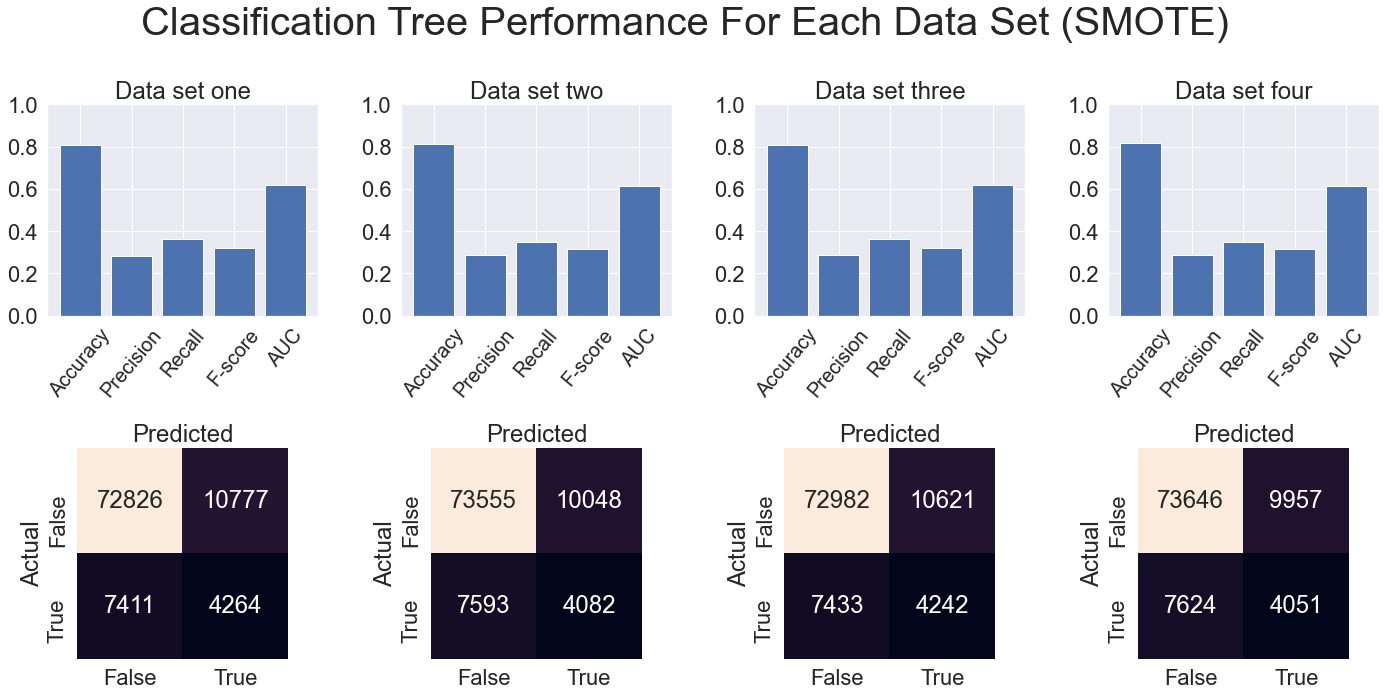

In [34]:
graphMLModels(DecisionTreeClassifier(random_state=0), 'Classification Tree', balanced='SMOTE');

When using SMOTE to balance the training data, we get a slight improvement in our recall for data set one and data set three. But this improvement is still not very high.

Finally, we undersample the majority class.

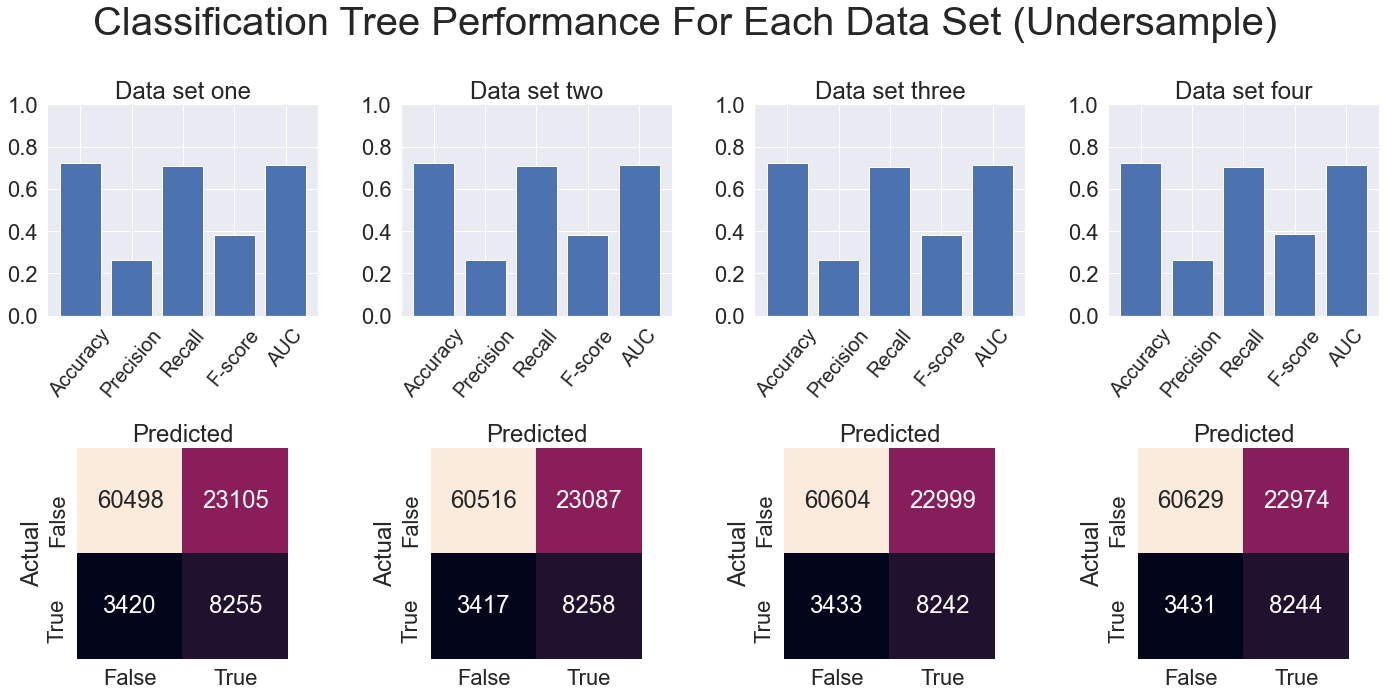

In [35]:
graphMLModels(DecisionTreeClassifier(random_state=0), 'Classification Tree', balanced='Undersample');

When undersampling the majority class, we get the highest precision score out of each of the balancing techniques. Because each data set performed equally the same, we are going to compute the rest of the optimizations using data set 4 (label encoding and scaling). 

<h3> Optimizing for accuracy </h3>
The first thing to do is do a grid search in order to find useful parameters.

In [36]:
predictors = df4.columns[df4.columns != 'Response']
X = df4[predictors] 
y = df4[target]   

# Split the data
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Join the training sets together again
temp_df = X_train_temp.join(y_train_temp)
# Get all the rows where the response is 1
minority_rows = temp_df[temp_df['Response'] == 1]
# Get the count of those rows
minority_count = minority_rows.shape[0]
# Get a sample of the observations in the data set that indicate they are not interested
majority_rows = temp_df[temp_df['Response'] == 0].sample(minority_count, replace=False, random_state=0)
# Join the two sets together
df_balanced = pd.concat([majority_rows, minority_rows])
# Shuffle the observations
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
# Remove the response from the balanced data set
X_train = df_balanced[df_balanced.columns[df_balanced.columns != 'Response']]
y_train = df_balanced['Response']

params = {'min_samples_split': [2, 3, 4, 5, 6], # Give the model the option to have anywhere between 2 to 6 variables to split
          'max_depth': np.arange(2,10), # Give the max depth anywhere from 2 to 9
          'criterion' : ['gini', 'entropy']} 

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=0), params, verbose=1, cv=5, return_train_score=True, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    8.6s finished


{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}

After doing a grid search, the best parameters are: <br>
<b> criterion: </b> entropy <br>
<b> max_depth: </b> 7 <br>
<b> min_samples_split: </b> 2 <br>

Next, we are going to find the best features for our model using feature selection.

In [37]:
# Create a new model with the best parameters
clf = DecisionTreeClassifier(max_depth=7, criterion='entropy', min_samples_split = 2)

predictors = df4.columns[df4.columns != 'Response']
X = df4[predictors] 
y = df4[target]   

# Split the data
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

temp_df = X_train_temp.join(y_train_temp)
# Get all the rows where the response is 1
minority_rows = temp_df[temp_df['Response'] == 1]
# Get the count of those rows
minority_count = minority_rows.shape[0]
# Get a sample of the observations in the data set that indicate they are not interested
majority_rows = temp_df[temp_df['Response'] == 0].sample(minority_count, replace=False, random_state=0)
# Join the two sets together
df_balanced = pd.concat([majority_rows, minority_rows])
# Shuffle the observations
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
# Remove the response from the balanced data set
X_train = df_balanced[df_balanced.columns[df_balanced.columns != 'Response']]
y_train = df_balanced['Response']

clf.fit(X_train, y_train)

# Print out the best features
temp1 = clf.feature_importances_
temp2 = np.array(df4.columns[df4.columns != 'Response'])
temp1 = temp1.reshape(len(temp1),1)
temp2 = temp2.reshape(len(temp2),1)
result = []
for i in range(10):
    temp = []
    temp.append(temp2[i].flatten()[0])
    temp.append(temp1[i].flatten()[0] * 100)
    result.append(temp)
pd.DataFrame(result, columns=['Feature','Level_of_importance'])

,Feature,Level_of_importance
0,Age,7.333639
1,Driving_License,0.043610
2,Region_Code,0.377897
3,Previously_Insured,79.990641
4,Annual_Premium,0.258997
5,Policy_Sales_Channel,2.565473
6,Vintage,0.257537
7,Gender_n,0.183660
8,Vehicle_Age_n,0.257517
9,Vehicle_Damage_n,8.731029


When looking at the results, there are only 4 features that contribute more than 1% importance. We are going to drop all the features with less than 1% importance from our model. Those features are Driving_license, Region_Code, Annual_Premium, and Vintage, Gender_n.

Next, construct a new model with those features.

In [38]:
def graphDecisionTree(new_cols, labels, threshold=0.5, title=''):
    scores = []
    X = df4[new_cols]
    y = df4[target]

    X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    # Join the training sets together again
    temp_df = X_train_temp.join(y_train_temp)
    # Get all the rows where the response is 1
    minority_rows = temp_df[temp_df['Response'] == 1]
    # Get the count of those rows
    minority_count = minority_rows.shape[0]
    # Get a sample of the observations in the data set that indicate they are not interested
    majority_rows = temp_df[temp_df['Response'] == 0].sample(minority_count, replace=False, random_state=0)
    # Join the two sets together
    df_balanced = pd.concat([majority_rows, minority_rows])
    # Shuffle the observations
    df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
    # Remove the response from the balanced data set
    X_train = df_balanced[df_balanced.columns[df_balanced.columns != 'Response']]
    y_train = df_balanced['Response']

    # Create a new model with the best parameters
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=2)
    clf.fit(X_train, y_train)

    # Check our predictions and apply thresholds
    prob = clf.predict_proba(X_test.values)[:,1]
    y_predict = (prob > threshold).astype(int)

    # Code for ROC curve
    fpr, tpr, _ = roc_curve(y_test.values, y_predict)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

    # Add all the metrics scores to a list to graph 
    scores.append(accuracy_score(y_test, y_predict).round(4))
    scores.append(precision_score(y_test, y_predict).round(4))
    scores.append(recall_score(y_test, y_predict).round(4))
    scores.append(f1_score(y_test, y_predict).round(4))
    scores.append(roc_auc_score(y_test, y_predict).round(4))

    # Plot both
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
    roc_display.plot(ax=ax1) # ROC
    ax2.bar(labels,scores)
    for i, col in enumerate(ax2.patches):
        ax2.text(col.get_x()+0.1, col.get_height(), scores[i].round(3))
    ax2.set_title('Metrics')
    ax2.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
    mat = confusion_matrix(y_test, y_predict) # Confusion Matrix
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, 
                xticklabels=['False','True'], yticklabels=['False','True'], 
                ax=ax3)
    ax1.set_title('ROC Curve')
    ax3.set_title('Predicted')
    ax3.set_ylabel('Actual')
    plt.suptitle(title)
    plt.tight_layout();

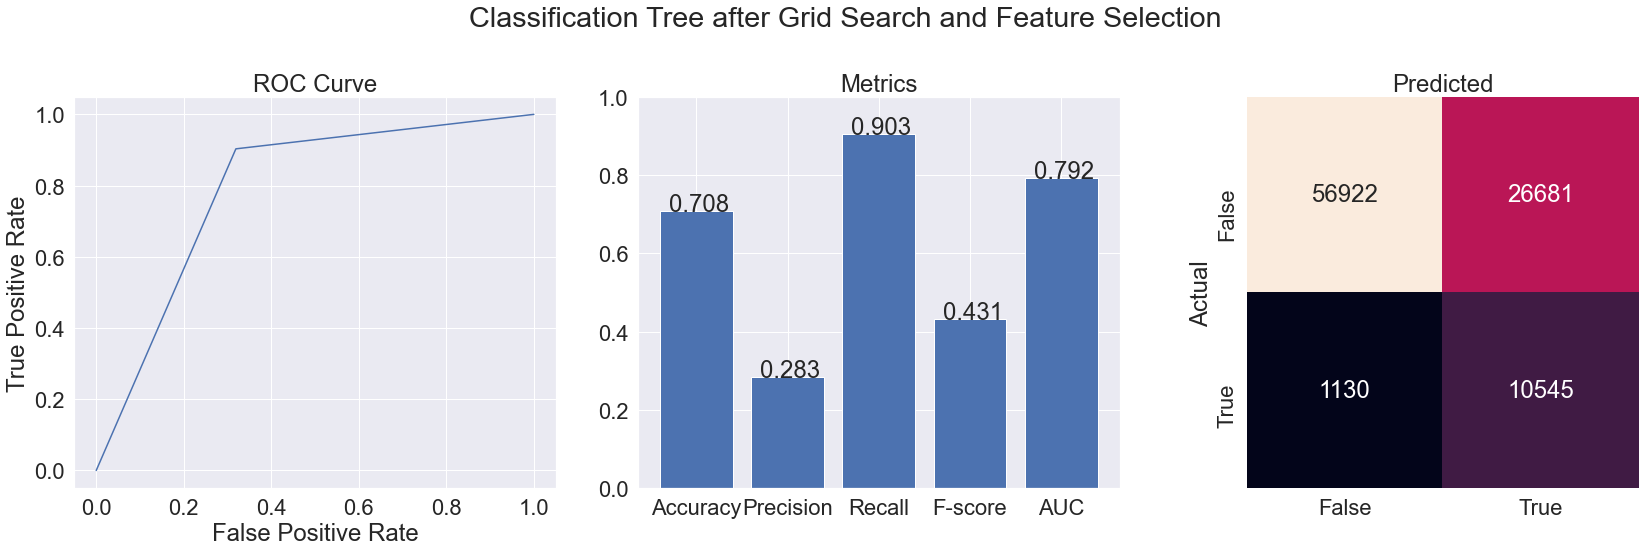

In [39]:
new_cols = ['Age', 'Previously_Insured', 'Policy_Sales_Channel', 'Vehicle_Damage_n']
labels = ['Accuracy', 'Precision', 'Recall', 'F-score', 'AUC']
title = 'Classification Tree after Grid Search and Feature Selection'
graphDecisionTree(new_cols, labels, threshold=0.5, title=title)

This model gives use a high recall score of over 90%. While it doesn't have a false negative as low as the naive bayes models, it does have a lot less false positives compared to them.

Next, we are going to manually compute our own metrics using thresholds from 0% to 99% and graph the results

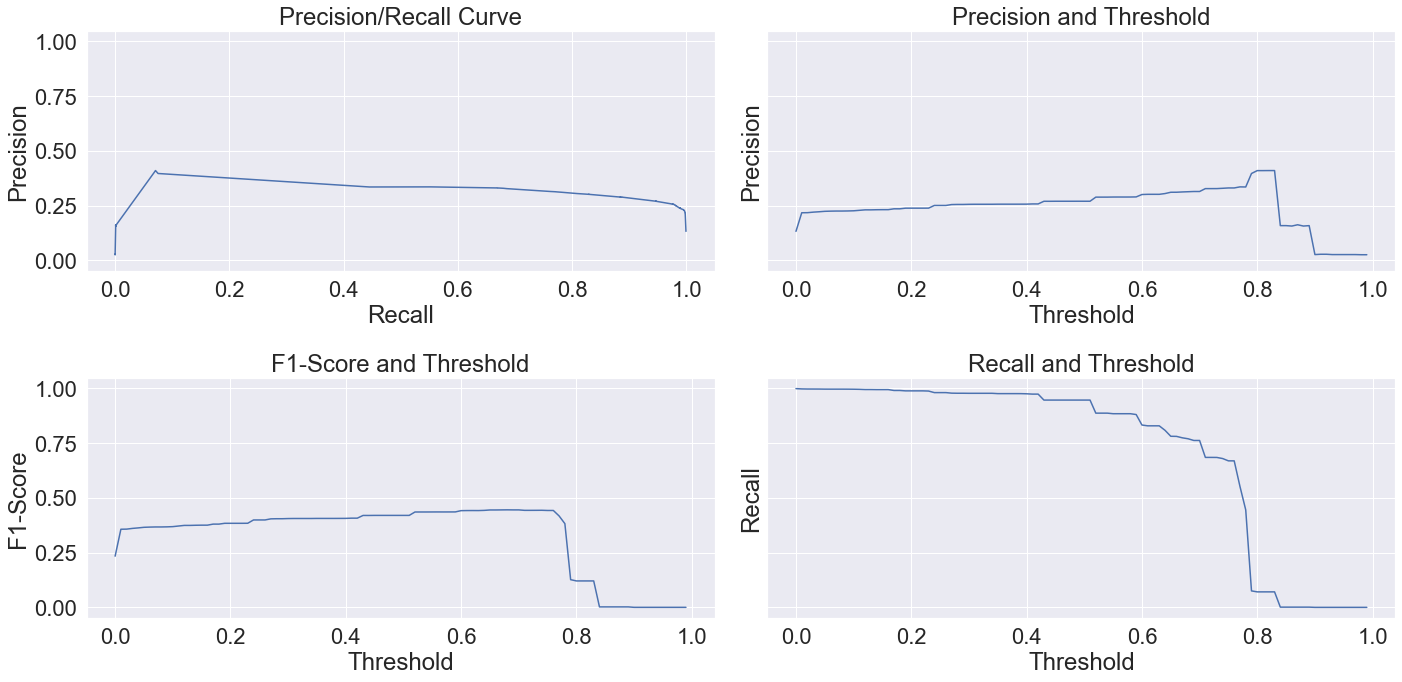

In [40]:
precision_list = []
recall_list = []
f1_list = []

# Loop through all the thresholds from 0.00 to 0.99
for i in range(0,100):
    p, r, f1 = ClassificationProbThreshold(DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=2), df4, df4.columns[df4.columns != 'Response'], 'Response', threshold=i/100)
    precision_list.append(p)
    recall_list.append(r)
    f1_list.append(f1)
    
threshold_list = np.arange(0,100) / 100
fig, axs = plt.subplots(2, 2, sharey=True)
axs[0, 0].plot(recall_list, precision_list)
axs[0, 0].set_title('Precision/Recall Curve')
axs[0, 0].set_xlabel('Recall')
axs[0, 0].set_ylabel('Precision')
axs[0, 1].plot(threshold_list, precision_list)
axs[0, 1].set_title('Precision and Threshold')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_xlabel('Threshold')
axs[1, 0].plot(threshold_list, f1_list)
axs[1, 0].set_title('F1-Score and Threshold')
axs[1, 0].set_ylabel('F1-Score')
axs[1, 0].set_xlabel('Threshold')
axs[1, 1].plot(threshold_list, recall_list)
axs[1, 1].set_title('Recall and Threshold')
axs[1, 1].set_xlabel('Threshold')
axs[1, 1].set_ylabel('Recall')
plt.tight_layout();

As before with our naive bayes model, the precision recall curve never reaches the top left corner because of the precision never reaching 100% even as we adjust the threshold.

Below we are going to be calculating the threshold value of the highest f-score.

In [41]:
thresh = np.where(max(f1_list) == f1_list)[0][0]
print("The threshold with the highest f-score:",thresh)

The threshold with the highest f-score: 68


<em>Applying the new threshold</em>

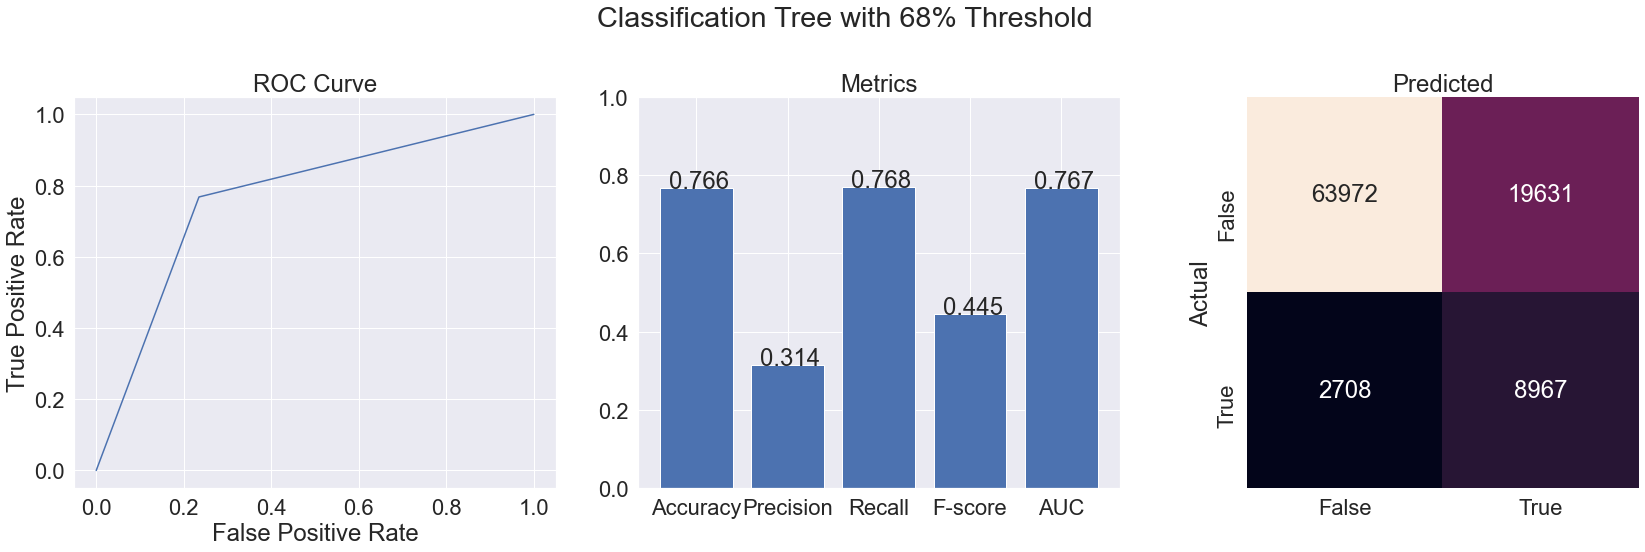

In [42]:
title = 'Classification Tree with 68% Threshold'
new_cols = ['Age', 'Previously_Insured', 'Policy_Sales_Channel', 'Vehicle_Damage_n']
labels = ['Accuracy', 'Precision', 'Recall', 'F-score', 'AUC']
graphDecisionTree(new_cols, labels, threshold=0.68, title=title)

When adjusting the threshold to 68%, we were able to increase the precision of the model from 28% to 31%. But this small raise in precision lowered the recall from 90% to 76%. This improvement in recall has lead to use having more false negatives compared to not adjusting the threshold amount.

<h3> Validation Curve </h3>

Below we show the validation curve of the recall and accuracy of our decision tree.

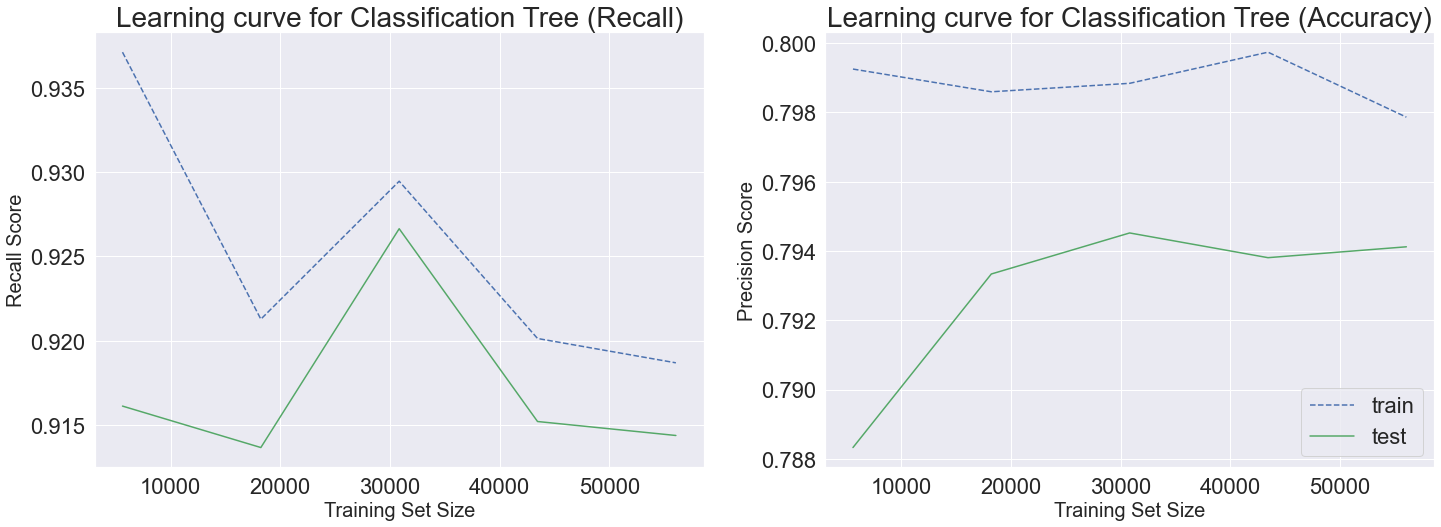

In [43]:
font_size=20

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

new_cols = ['Age', 'Previously_Insured', 'Policy_Sales_Channel', 'Vehicle_Damage_n']
target = 'Response'

X = df4[new_cols]
y = df4[target]

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Join the training sets together again
temp_df = X_train_temp.join(y_train_temp)
# Get all the rows where the response is 1
minority_rows = temp_df[temp_df['Response'] == 1]
# Get the count of those rows
minority_count = minority_rows.shape[0]
# Get a sample of the observations in the data set that indicate they are not interested
majority_rows = temp_df[temp_df['Response'] == 0].sample(minority_count, replace=False, random_state=0)
# Join the two sets together
df_balanced = pd.concat([majority_rows, minority_rows])
# Shuffle the observations
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
# Remove the response from the balanced data set
X_train = df_balanced[df_balanced.columns[df_balanced.columns != 'Response']]
y_train = df_balanced['Response']

# Left Graph
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=7, criterion='entropy', min_samples_split = 2), X_train, y_train, cv=5, scoring='recall')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
ax1.plot(train_sizes, train_scores_mean,'--', color="b", label='train')
ax1.plot(train_sizes, test_scores_mean, label='test', color="g")
ax1.set_xlabel('Training Set Size', fontsize=font_size)
ax1.set_ylabel('Recall Score', fontsize=font_size)
ax1.set_title('Learning curve for Classification Tree (Recall)', fontsize=font_size+8)

# Right graph
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=7, criterion='entropy', min_samples_split = 2), X_train, y_train, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
ax2.plot(train_sizes, train_scores_mean,'--', color="b", label='train')
ax2.plot(train_sizes, test_scores_mean, label='test', color="g")
ax2.set_xlabel('Training Set Size', fontsize=font_size)
ax2.set_ylabel('Precision Score', fontsize=font_size)
ax2.set_title('Learning curve for Classification Tree (Accuracy)', fontsize=font_size+8);
plt.legend();

Both the graphs above show that our final classification tree model has very high bias. One of the reasons we have a very high bias because this data set is imbalanced. Even with apply techniques to balance the data set, it is still leading to high biases. 

<h1> Conclusion </h1>

The model we decided was the best fit used a Classification Tree and implemented the following columns: 'Age', 'Previously_Insured', 'Policy_Sales_Channel', and  'Vehicle_Damage_n. From Data Set 4. We converted the categorical data using label encoding and scaling. We further branched out by using undersampling in the majority class. After we conducted a grid search, we returned the following as the best parameters: criterion='entropy', max_depth=7, min_samples_split=2. Given these, we also saw no need in adjusting the Threshold, leaving it at the default 50% value. The reason we ultimately chose this model over others because we correctly predicted (true positive) 10,500 customers who would be interested in picking up the addtional Automotive Insurance, with a marginal  prediction of 1,100 customers that we incorrectly identified. However, on the other end, we incorrectly predicted (false positive) 26,600 customers who the model said would be interested, but actually weren't. Out of all the models we built and tested, this particular model delivered the best overall balance between true positive and false positives, while also minimizing our false negatives (1,100). <br>

Healthcare is a field that, even for the most experienced individuals, can be difficult to navigate in several aspects. We reached out to and had a talk with Kur Song and Thomas Ngo, respectively the Chief Data Officer of the San Joaquin General Hospital and Managing Director of Healthcare Analytics of the Santa Clara Health Plan. We were gracious enough to be walked through the process of what it truly takes to onboard a population under a Health Insurance Policy. From the Software Engineering that it takes to manage massive amounts of data, to the constant communication within your network to maintain relationships with Providers, Specialists, Management, etc. We truly got a peek into just how extraordinarily complex this world is. With that in mind, the cross section that is met when you encompass the vertical of Automotive Insurance further complicates the process. With factors in play as unique as Taxonomy Codes and Provider Designations already exhausting the amount of resources available to your organization - finding the right model that is most likely to select the correct individuals to grow your bottom line is absolutely critical. <br>

Overall, our exploration of the data set led to some interesting findings and further allowed us to build upon the knowledge we gained throughout the semester. <br>

